In [1]:
# Import default settings
import warnings
warnings.filterwarnings("ignore")

import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib


sns.set()
pd.set_option("display.max_columns", None)

In [2]:
import tensorflow

In [3]:
# Check file path
files = "./Data" 
os.listdir(files)

['Test', 'Train', 'Validation']

In [4]:
# Set ImageDataGen config 

from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg

# make path variables
train_dir = f"{files}/Train"
valid_dir = f"{files}/Validation"
test_dir = f"{files}/Test"

img_height = 150
img_width = 150

# Parameter of Train data with data augmetation, Normarization
train_datagen = idg(
    rescale = 1./255,
    brightness_range = [0.9, 1.4],
    horizontal_flip = True,
)

# Parameter of Normalization for Valid and Test data 
valid_datagen = idg(
    rescale = 1./255
)
test_datagen = idg(
    rescale = 1./255
)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_height, img_width),
    batch_size = 507,
    class_mode = "binary",
    shuffle = True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (img_height, img_width),
    batch_size = 200,
    class_mode = "binary",
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_height, img_width),
    batch_size = 200,
    class_mode = "binary",
    shuffle = True
)

Found 507 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


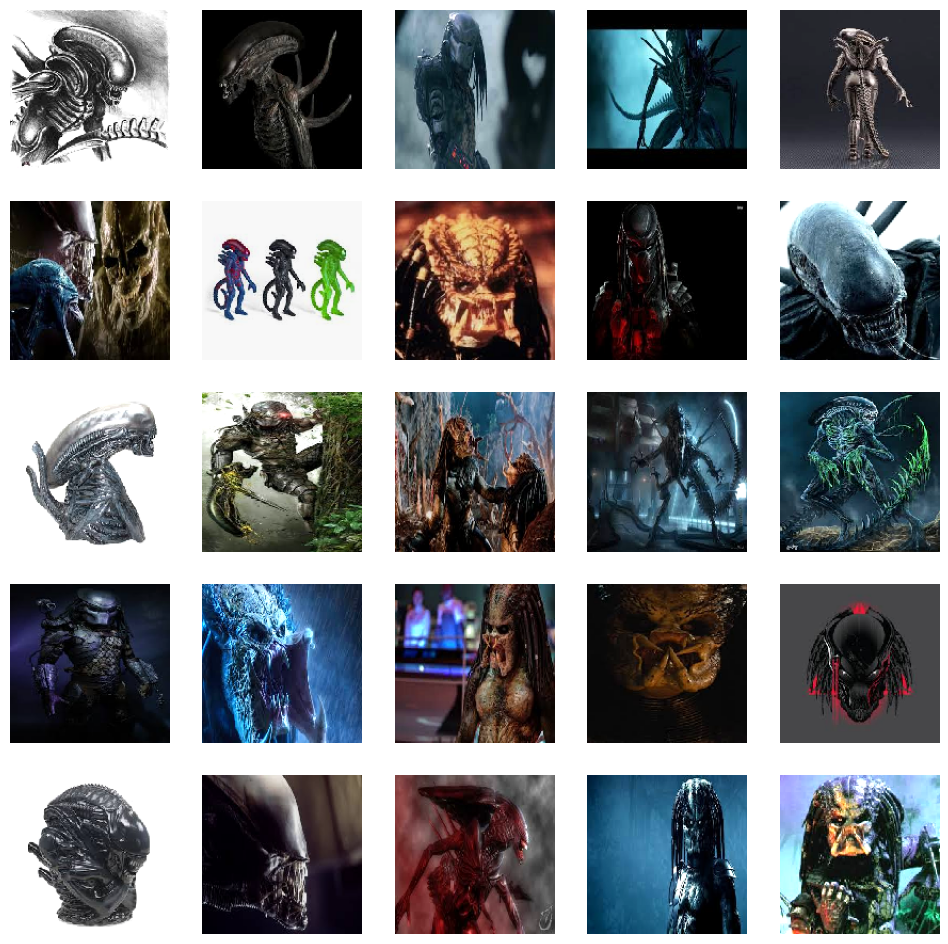

In [7]:
items = next(iter(train_generator))

plt.figure(figsize=(12,12))
for i, image in enumerate(items[0][:25], 1):
    plt.subplot(5,5,i)
    plt.imshow(image)
    plt.axis('off')

In [8]:
train_generator.class_indices

{'Alien': 0, 'Predator': 1}

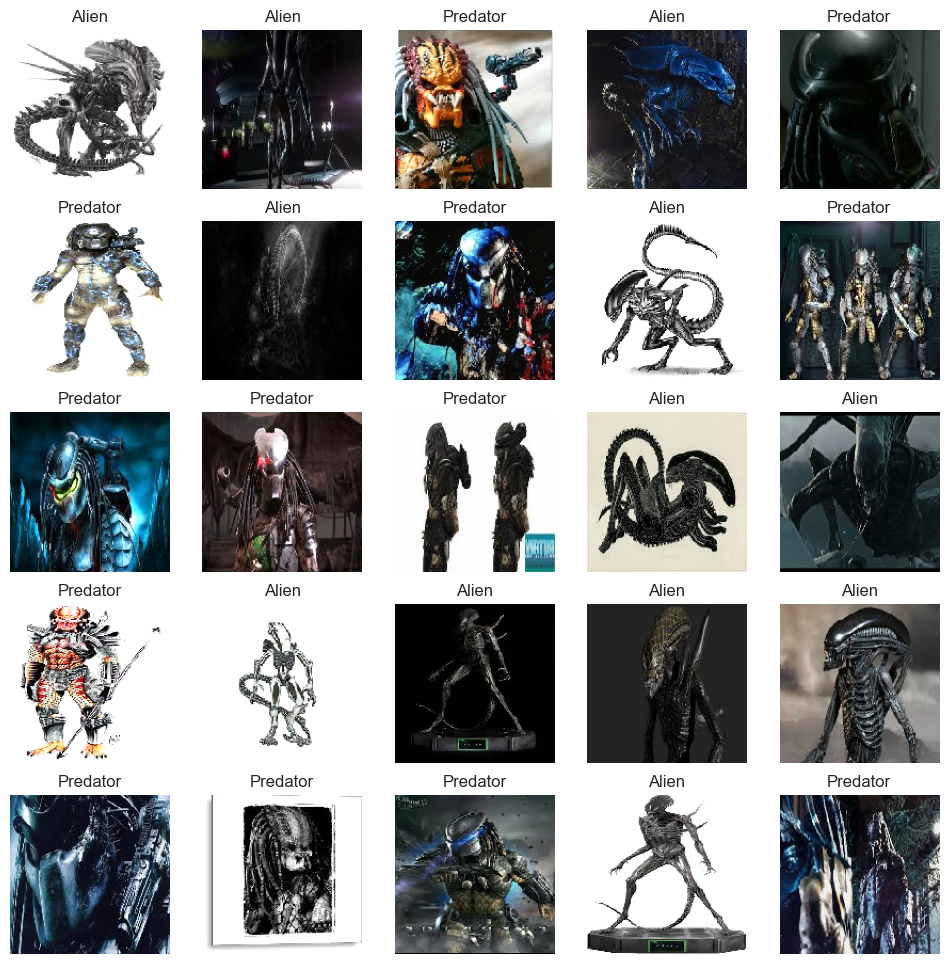

In [9]:
index2label_dict = {
    0 : 'Alien',
    1 : 'Predator',
    }

items = next(iter(train_generator))

plt.figure(figsize=(12,12))
for i, image in enumerate(items[0][:25], 1):
    label_index = np.argmax(items[1][i-1])
    label_name = index2label_dict[label_index]
    plt.subplot(5,5,i)
    plt.imshow(image)
    plt.title(label_name)
    plt.axis('off')

In [10]:
train_generator.next()

(array([[[[0.11764707, 0.16862746, 0.19607845],
          [0.11764707, 0.16862746, 0.19607845],
          [0.11764707, 0.16862746, 0.19607845],
          ...,
          [0.02745098, 0.02745098, 0.02745098],
          [0.03529412, 0.03529412, 0.03529412],
          [0.03921569, 0.03921569, 0.03921569]],
 
         [[0.11764707, 0.16862746, 0.19607845],
          [0.11764707, 0.16862746, 0.19607845],
          [0.11764707, 0.16862746, 0.19607845],
          ...,
          [0.02745098, 0.02745098, 0.02745098],
          [0.03529412, 0.03529412, 0.03529412],
          [0.03921569, 0.03921569, 0.03921569]],
 
         [[0.11764707, 0.16862746, 0.19607845],
          [0.11764707, 0.16862746, 0.19607845],
          [0.11764707, 0.16862746, 0.19607845],
          ...,
          [0.02745098, 0.02745098, 0.02745098],
          [0.03137255, 0.03137255, 0.03137255],
          [0.03529412, 0.03529412, 0.03529412]],
 
         ...,
 
         [[0.09411766, 0.16078432, 0.20392159],
          [0.09411

In [11]:
train_generator.next()[1]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [16]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(filters=16, kernel_size=3, strides=1, activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=1, activation='sigmoid')
    
])

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [ ]:
history = model.fit(
    train_generator,
    batch_size = 507,
    epochs = 500,
    validation_data = valid_generator
)

Epoch 1/500
1/1 [==============================] - 14s 14s/step - loss: 0.6938 - accuracy: 0.5148 - val_loss: 0.7255 - val_accuracy: 0.5050
Epoch 2/500
1/1 [==============================] - 8s 8s/step - loss: 0.7325 - accuracy: 0.4990 - val_loss: 2.8434 - val_accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 9s 9s/step - loss: 2.8927 - accuracy: 0.5069 - val_loss: 1.5240 - val_accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 8s 8s/step - loss: 1.5611 - accuracy: 0.5069 - val_loss: 0.6817 - val_accuracy: 0.5700
Epoch 5/500
1/1 [==============================] - 9s 9s/step - loss: 0.6600 - accuracy: 0.5878 - val_loss: 0.7525 - val_accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 8s 8s/step - loss: 0.7735 - accuracy: 0.4931 - val_loss: 0.7584 - val_accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 8s 8s/step - loss: 0.7869 - accuracy: 0.4931 - val_loss: 0.7284 - val_accuracy: 0.5000
Epoch 8/500
1/1 [===============

In [ ]:
history.history.keys()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(train_history.history['loss'])
ax.plot(train_history.history['val_loss'], label="validation"),
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
ax.set_xlim(0, 5000)
ax.set_ylim(-0.01, 0.5)
# plt.savefig('nn-regression-train-1.png', dpi=300, facecolor='white')
plt.show()